# Table of Contents

## * [ML Section](#h0)
###  1. [Data Preprocessing & SVM using Diabetes Dataset](#h3)
###  2. [Decision Tree using Salary Dataset](#h4)
###  3. [Linear Regression using Housing Dataset](#h5)

## * [DL Section - FCNN & CNN](#h1)

# <font color='Blue'><b> ML Section <a class="anchor"  id="h0"></a>

## Imports

In [10]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder # Ordinal encoding depends on orderwise data
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
warnings.filterwarnings('ignore')

# 1. Data Preprocessing & SVM using Diabetes dataset <a class="anchor"  id="h3"></a>

In [42]:
df=pd.read_csv('/kaggle/input/mra-datasets/diabetes_two (1).csv')


In [43]:
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40.0,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58.0,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,NaN,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45.0,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,600.0,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [44]:
df[80:85] #Shows the specific index of rows

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
80,35.0,Female,Yes,Yes,No,Yes,No,No,Yes,No,No,No,No,No,No,No,Positive
81,47.0,Female,No,No,Yes,Yes,Yes,No,No,No,No,No,No,Yes,No,No,Positive
82,50.0,Female,Yes,Yes,No,Yes,Yes,No,No,No,No,Yes,Yes,No,No,No,Positive
83,48.0,Female,Yes,Yes,No,Yes,No,No,Yes,Yes,No,Yes,Yes,No,No,No,Positive
84,35.0,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,No,Yes,Yes,Yes,No,No,Positive


In [45]:
df['Gender'].head() #Show the specific column 

0    Male
1    Male
2    Male
3    Male
4    Male
Name: Gender, dtype: object

In [46]:
df.loc[(df.Gender=='Male') & (df.Age>40)] #Shows the all information of exact data of the dataset

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
1,58.0,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
3,45.0,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,600.0,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive
5,55.0,Male,Yes,Yes,No,Yes,Yes,No,Yes,Yes,No,Yes,No,Yes,Yes,Yes,Positive
6,57.0,Male,Yes,Yes,No,Yes,Yes,Yes,No,No,No,Yes,Yes,No,No,No,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509,54.0,Male,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Negative
510,67.0,Male,No,No,No,Yes,No,No,No,Yes,No,Yes,No,No,Yes,No,Negative
511,66.0,Male,No,No,No,Yes,Yes,No,Yes,Yes,No,Yes,Yes,Yes,Yes,No,Negative
512,43.0,Male,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,Negative


In [47]:
df['Gender'].iloc[65:75] # Using iloc show the any index number of class

65    Female
66    Female
67    Female
68    Female
69    Female
70    Female
71    Female
72    Female
73    Female
74    Female
Name: Gender, dtype: object

### Handing Missing Value

In [48]:
df.isnull()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
516,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
517,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
518,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [49]:
df.isnull().sum() #counts the no. of null values in each column

Age                   1
Gender                1
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              1
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

In [50]:
df.info() # shows datatype and count of each class

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 519 non-null    float64
 1   Gender              519 non-null    object 
 2   Polyuria            520 non-null    object 
 3   Polydipsia          520 non-null    object 
 4   sudden weight loss  520 non-null    object 
 5   weakness            519 non-null    object 
 6   Polyphagia          520 non-null    object 
 7   Genital thrush      520 non-null    object 
 8   visual blurring     520 non-null    object 
 9   Itching             520 non-null    object 
 10  Irritability        520 non-null    object 
 11  delayed healing     520 non-null    object 
 12  partial paresis     520 non-null    object 
 13  muscle stiffness    520 non-null    object 
 14  Alopecia            520 non-null    object 
 15  Obesity             520 non-null    object 
 16  class   

In [51]:
df.describe() # this function works only for numerical data

,Age
count,519.000000
mean,49.082852
std,27.104027
min,16.000000
25%,39.000000
50%,48.000000
75%,57.000000
max,600.000000


In [52]:
len(df)

520

In [53]:
df1=df
df2=df
df3=df

In [54]:
df1.isnull().sum()

Age                   1
Gender                1
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              1
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

### Drop the entire row that has missing value

In [56]:
df1.dropna(subset=['Age'],inplace=True);
df1.dropna(subset=['Gender'],inplace=True);
df1.dropna(subset=['weakness'],inplace=True)

In [57]:
df1.isnull().sum()


Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

In [58]:
len(df1)

517

### Replacing missing values

In [59]:
df2['Age']=df2['Age'].fillna(df2['Age'].mean()) # fill null value with mean(). Here we use mean or median because 'Age' column is a numerical value

df2['Age']=df2['Age'].fillna(df2['Age'].median()) # fill null value with median()


In [60]:
most_frequent_category=df2['Gender'].mode().iloc[0]  # find the most frequent category
df2['Gender'].fillna(most_frequent_category,inplace=True) # replace the most frequent category


In [62]:
df2.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40.0,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58.0,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
3,45.0,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,600.0,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive
5,55.0,Male,Yes,Yes,No,Yes,Yes,No,Yes,Yes,No,Yes,No,Yes,Yes,Yes,Positive


### Encoding Categorical values

In [64]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [65]:
# Here "fit_transform()" function converts the categorical value to numerical value
df['Gender']=le.fit_transform(df['Gender'])       
df['Polyuria']=le.fit_transform(df['Polyuria'])   
df['Polydipsia']=le.fit_transform(df['Polydipsia']) 
df['sudden weight loss']=le.fit_transform(df['sudden weight loss'])
df['weakness']=le.fit_transform(df['weakness'])
df['Polyphagia']=le.fit_transform(df['Polyphagia'])
df['Genital thrush']=le.fit_transform(df['Genital thrush']) 
df['visual blurring']=le.fit_transform(df['visual blurring']) 
df['Itching']=le.fit_transform(df['Itching']) 
df['Irritability']=le.fit_transform(df['Irritability'])
df['delayed healing']=le.fit_transform(df['delayed healing']) 
df['partial paresis']=le.fit_transform(df['partial paresis']) 
df['muscle stiffness']=le.fit_transform(df['muscle stiffness'])
df['Alopecia']=le.fit_transform(df['Alopecia']) 
df['Obesity']=le.fit_transform(df['Obesity'])
df['class']=le.fit_transform(df['class']) 

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 517 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 517 non-null    float64
 1   Gender              517 non-null    int64  
 2   Polyuria            517 non-null    int64  
 3   Polydipsia          517 non-null    int64  
 4   sudden weight loss  517 non-null    int64  
 5   weakness            517 non-null    int64  
 6   Polyphagia          517 non-null    int64  
 7   Genital thrush      517 non-null    int64  
 8   visual blurring     517 non-null    int64  
 9   Itching             517 non-null    int64  
 10  Irritability        517 non-null    int64  
 11  delayed healing     517 non-null    int64  
 12  partial paresis     517 non-null    int64  
 13  muscle stiffness    517 non-null    int64  
 14  Alopecia            517 non-null    int64  
 15  Obesity             517 non-null    int64  
 16  class        

### One-Hot Encoding

In [70]:
one_hot_encoded=pd.get_dummies(df,columns=['Gender','Polyuria','Polydipsia','sudden weight loss','weakness','Polyphagia','Genital thrush','visual blurring','Itching','Irritability',
                                          'delayed healing','partial paresis','muscle stiffness','Alopecia','Obesity', 'class'
                                          ])

In [71]:
one_hot_encoded

,Age,Gender_0,Gender_1,Polyuria_0,Polyuria_1,Polydipsia_0,Polydipsia_1,sudden weight loss_0,sudden weight loss_1,weakness_0,...,partial paresis_0,partial paresis_1,muscle stiffness_0,muscle stiffness_1,Alopecia_0,Alopecia_1,Obesity_0,Obesity_1,class_0,class_1
0,40.0,False,True,True,False,False,True,True,False,False,...,True,False,False,True,False,True,False,True,False,True
1,58.0,False,True,True,False,True,False,True,False,False,...,False,True,True,False,False,True,True,False,False,True
3,45.0,False,True,True,False,True,False,False,True,False,...,True,False,True,False,True,False,True,False,False,True
4,600.0,False,True,False,True,False,True,False,True,False,...,False,True,False,True,False,True,False,True,False,True
5,55.0,False,True,False,True,False,True,True,False,False,...,True,False,False,True,False,True,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39.0,True,False,False,True,False,True,False,True,True,...,False,True,True,False,True,False,True,False,False,True
516,48.0,True,False,False,True,False,True,False,True,False,...,False,True,True,False,True,False,True,False,False,True
517,58.0,True,False,False,True,False,True,False,True,False,...,False,True,False,True,True,False,False,True,False,True
518,32.0,True,False,True,False,True,False,True,False,False,...,True,False,True,False,False,True,True,False,True,False


In [72]:
one_hot_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 517 entries, 0 to 519
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   517 non-null    float64
 1   Gender_0              517 non-null    bool   
 2   Gender_1              517 non-null    bool   
 3   Polyuria_0            517 non-null    bool   
 4   Polyuria_1            517 non-null    bool   
 5   Polydipsia_0          517 non-null    bool   
 6   Polydipsia_1          517 non-null    bool   
 7   sudden weight loss_0  517 non-null    bool   
 8   sudden weight loss_1  517 non-null    bool   
 9   weakness_0            517 non-null    bool   
 10  weakness_1            517 non-null    bool   
 11  Polyphagia_0          517 non-null    bool   
 12  Polyphagia_1          517 non-null    bool   
 13  Genital thrush_0      517 non-null    bool   
 14  Genital thrush_1      517 non-null    bool   
 15  visual blurring_0     517 no

###  Imbalance Dataset Issue

In [73]:
df['class'].unique() # finding unique values

array([1, 0])

In [74]:
df['class'].nunique() #find how many unique values

2

In [75]:
count_value=df.groupby('class').size().reset_index(name='Count')
count_value

,class,Count
0,0,200
1,1,317


### Undersample

In [76]:
from sklearn.utils import resample

majority_class=df[df['class']==1]
minority_class=df[df['class']==0]

n_samples=len(minority_class)

majority_reduce= resample(majority_class, replace=False, n_samples = n_samples, random_state=42)
balanced_df=pd.concat([minority_class,majority_reduce])

In [77]:
value_counts=balanced_df.groupby('class').size().reset_index(name='Count')
value_counts

,class,Count
0,0,200
1,1,200


## Oversample

In [78]:
from imblearn.over_sampling import SMOTE

In [79]:
X=df.drop('class',axis=1)
Y=df['class']

smote=SMOTE(random_state=42)

X_resampled,Y_resampled=smote.fit_resample(X,Y)

oversampled_df=pd.DataFrame(X_resampled, columns=X.columns)
oversampled_df['class']=Y_resampled

In [80]:
value_counts=oversampled_df.groupby('class').size().reset_index(name="Count")
value_counts

,class,Count
0,0,317
1,1,317


## Part-5: Outlier Finding and Removing

### 5.A Finding from Figure

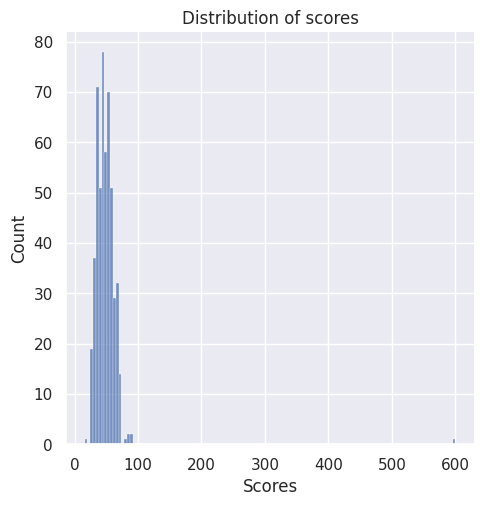

In [83]:
sns.set_theme(color_codes="red")
sns.displot(data=df['Age']).set(title='Distribution of scores', xlabel="Scores") # We use plotting for visualizing the data clearly

### 5.B Statistical Approach

In [84]:
df.describe()  # describe() function always give the analysis of numeric value

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,49.112186,0.628627,0.493230,0.448743,0.417795,0.586074,0.456480,0.220503,0.450677,0.485493,0.239845,0.458414,0.433269,0.373308,0.340426,0.170213,0.613153
std,27.151937,0.483640,0.500438,0.497847,0.493674,0.493013,0.498585,0.414987,0.498043,0.500274,0.427402,0.498750,0.496007,0.484151,0.474311,0.376184,0.487500
min,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,48.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,600.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### 5.C By finding the Z-score approach[-3 to 3] 

In [85]:
z_score=(df['Age']-df['Age'].mean())/df['Age'].std()
z_score

0      -0.335600
1       0.327336
3      -0.151451
4      20.289079
5       0.216847
         ...    
515    -0.372430
516    -0.040962
517     0.327336
518    -0.630238
519    -0.261940
Name: Age, Length: 517, dtype: float64

In [86]:
for i in z_score:
  if(i<-3):
    print("Have Outlier",i)
  elif(i>3):
    print("Have Outlier",i)
  else:
    continue


Have Outlier 20.289079482050578


In [87]:
index=z_score.index[z_score==20.289079482050578]  # find the index of the outlier
print(index)

Index([4], dtype='int64')


In [88]:
df['Age'][4]  # find the exact value of the index

600.0

In [89]:
df['Age'][4]=df['Age'].mean() # Now replace the outlier value by the mean value of the "Age"

In [90]:
df['Age'][4]

49.112185686653774

## Part-6: Handling Duplicate Samples

In [91]:
duplicates=df[df.duplicated(keep='first')]  # find the duplicated value
duplicates

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
84,35.0,0,1,1,1,1,1,0,1,1,0,1,1,1,0,0,1
159,38.0,0,1,1,1,1,1,0,1,1,1,1,1,1,0,0,1
160,28.0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1
161,68.0,0,1,1,0,1,1,0,1,1,0,1,1,0,0,0,1
162,35.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,53.0,1,0,0,0,1,0,0,1,1,0,1,0,1,1,0,0
497,47.0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0
498,68.0,0,1,1,0,1,1,0,1,1,0,1,1,0,0,0,1
499,64.0,1,0,0,0,1,1,0,1,1,1,1,0,1,1,0,0


In [92]:
df_no_duplicate=df.drop_duplicates() # drop the all duplicates value

In [93]:
duplicates=df_no_duplicate[df_no_duplicate.duplicated(keep="first")] # recheck duplicate value have or not
duplicates

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class


In [94]:
df_no_duplicate

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40.000000,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58.000000,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
3,45.000000,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,49.112186,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1
5,55.000000,1,1,1,0,1,1,0,1,1,0,1,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39.000000,0,1,1,1,0,1,0,0,1,0,1,1,0,0,0,1
516,48.000000,0,1,1,1,1,1,0,0,1,1,1,1,0,0,0,1
517,58.000000,0,1,1,1,1,1,0,1,0,0,0,1,1,0,1,1
518,32.000000,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0


## Part-7: Feature Engineering 

### Pearson Correlation/heatmap

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5]),
 [Text(0.5, 0, 'Age'),
  Text(1.5, 0, 'Gender'),
  Text(2.5, 0, 'Polyuria'),
  Text(3.5, 0, 'Polydipsia'),
  Text(4.5, 0, 'sudden weight loss'),
  Text(5.5, 0, 'weakness'),
  Text(6.5, 0, 'Polyphagia'),
  Text(7.5, 0, 'Genital thrush'),
  Text(8.5, 0, 'visual blurring'),
  Text(9.5, 0, 'Itching'),
  Text(10.5, 0, 'Irritability'),
  Text(11.5, 0, 'delayed healing'),
  Text(12.5, 0, 'partial paresis'),
  Text(13.5, 0, 'muscle stiffness'),
  Text(14.5, 0, 'Alopecia'),
  Text(15.5, 0, 'Obesity'),
  Text(16.5, 0, 'class')])

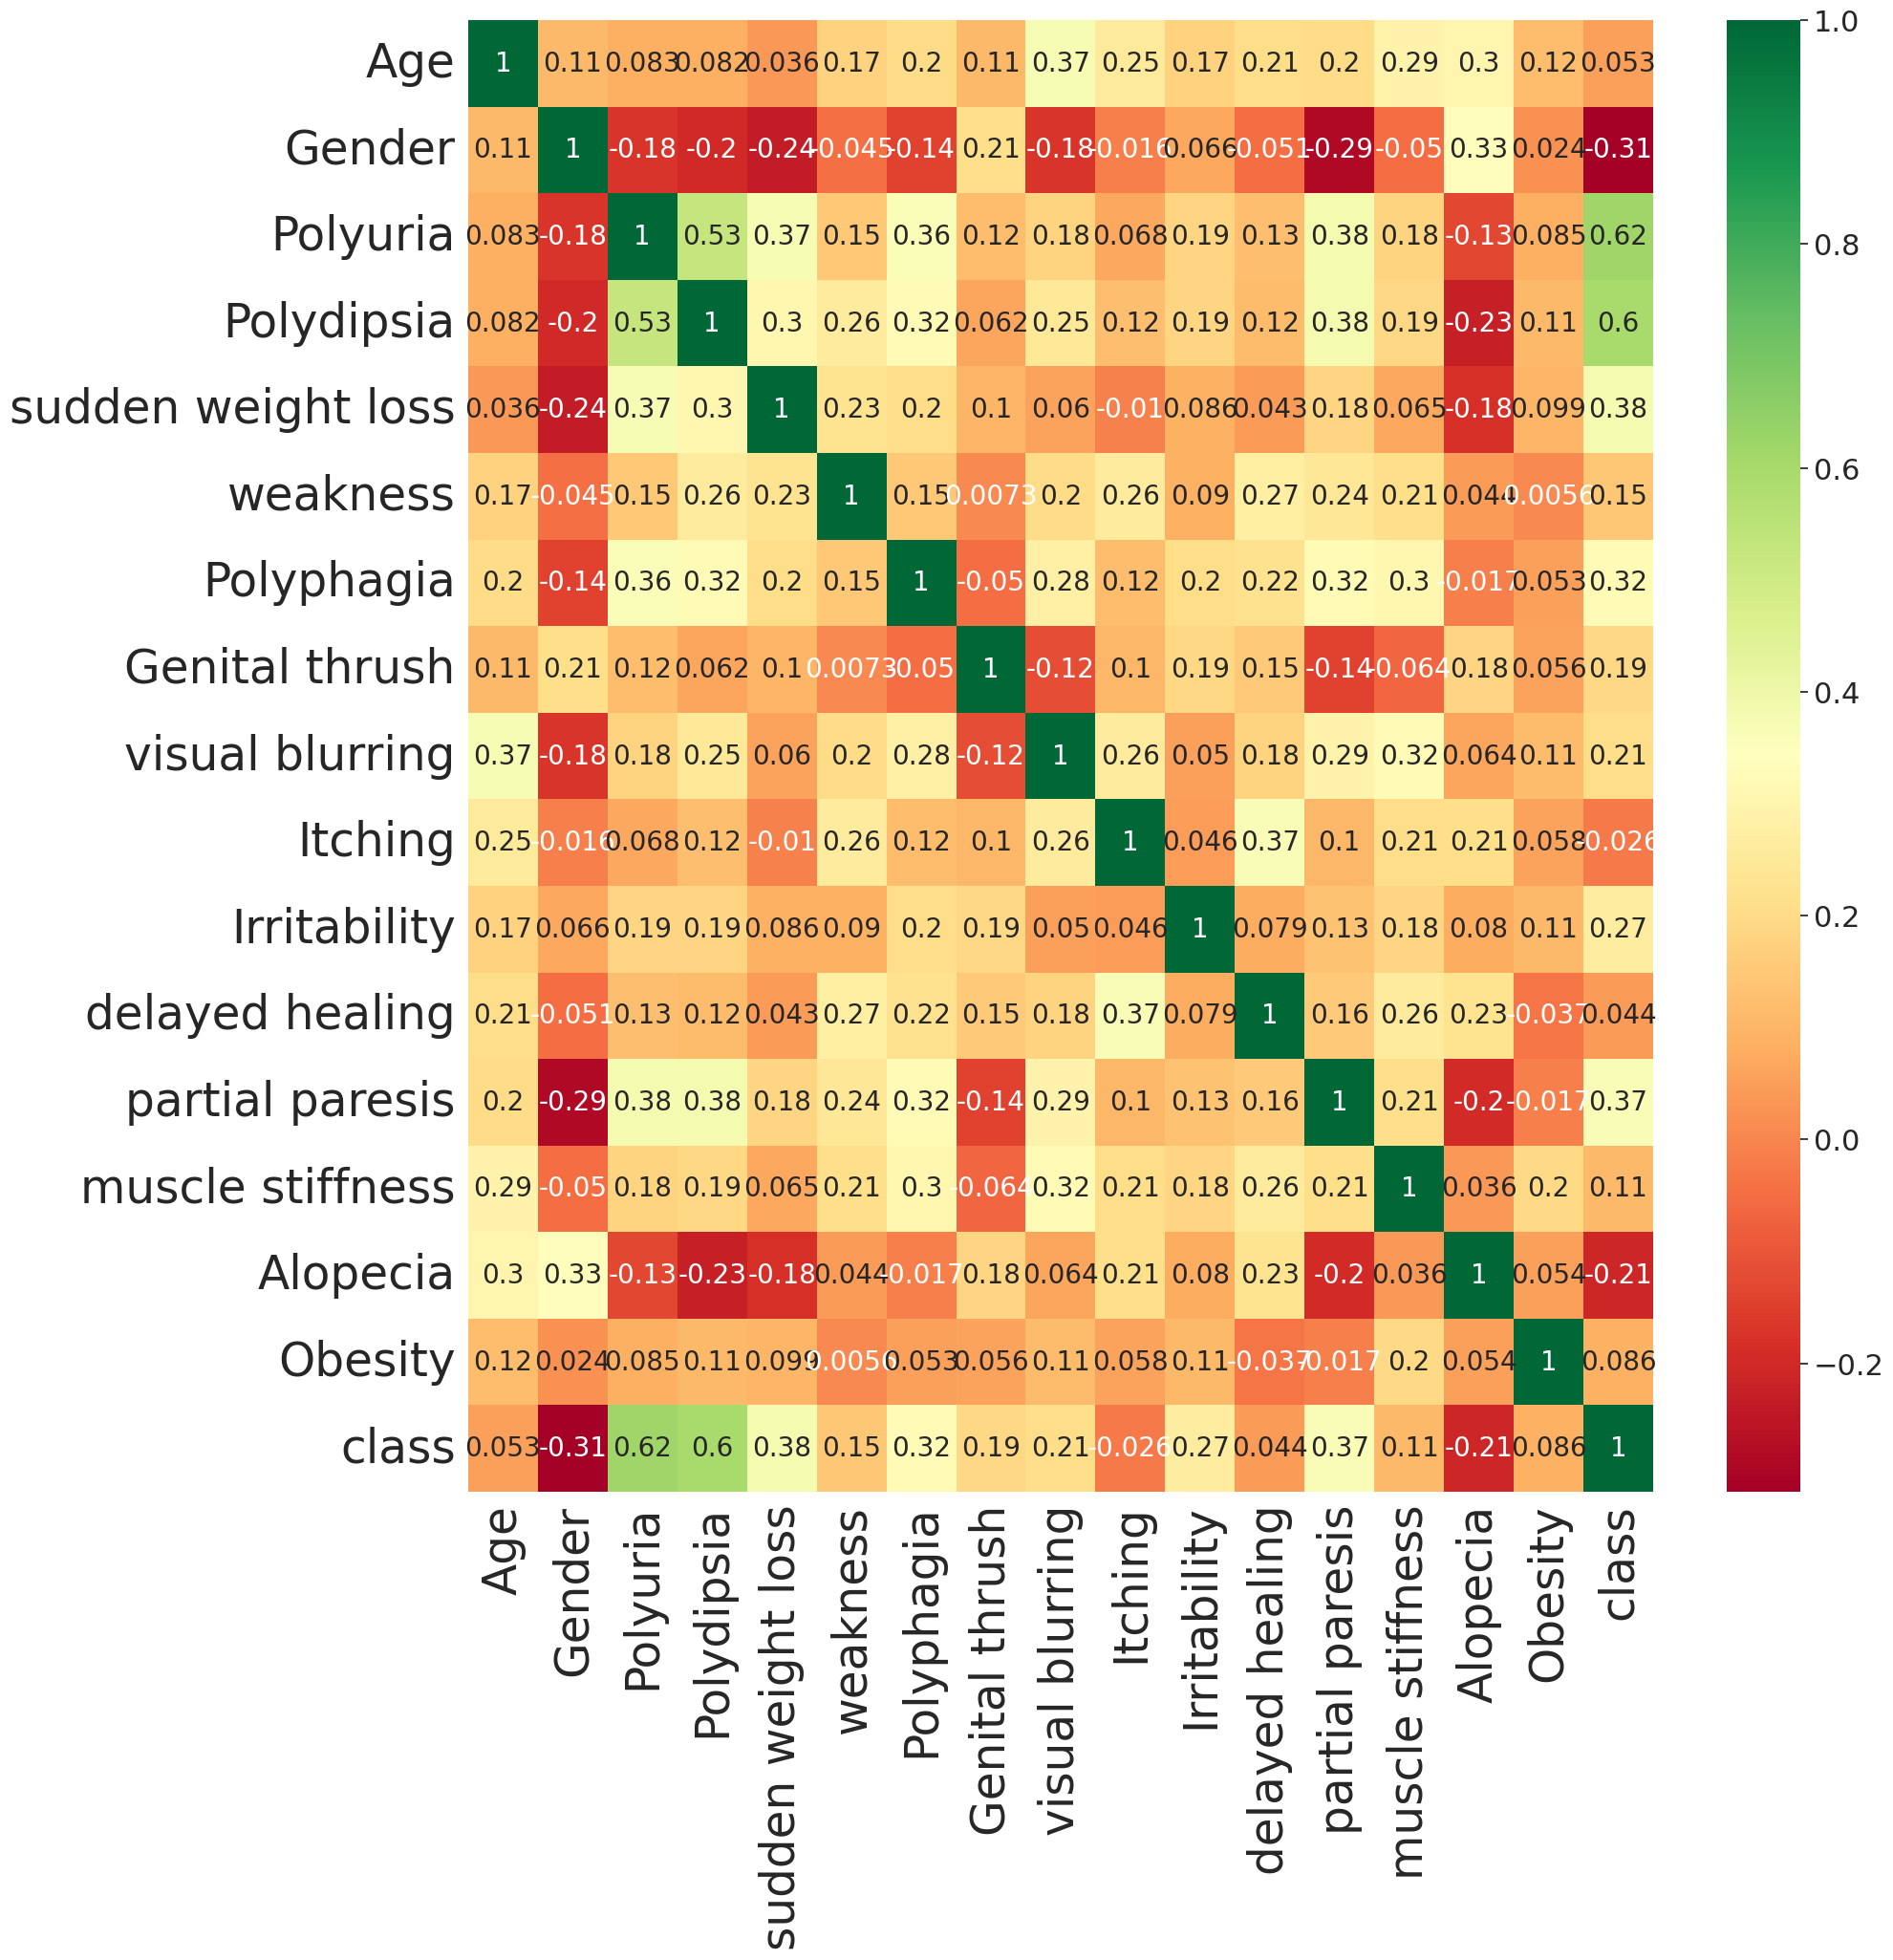

In [95]:
sns.set(font_scale=2)
plt.subplots(figsize=(20,20))
heat_plot=sns.heatmap(df_no_duplicate.corr(method='pearson'),annot=True, cmap='RdYlGn',annot_kws={'size':20})

plt.yticks(fontsize=35) # that means font size of the y-axis
plt.xticks(fontsize=35) # that means font size of the x-axis


In [96]:
correaltion=df_no_duplicate.corr(method='pearson')
descending_sort=correaltion['class'].sort_values(ascending=False).to_string()


In [97]:
print(descending_sort)

class                 1.000000
Polyuria              0.619235
Polydipsia            0.598018
sudden weight loss    0.378853
partial paresis       0.366982
Polyphagia            0.318299
Irritability          0.268261
visual blurring       0.205055
Genital thrush        0.189799
weakness              0.146758
muscle stiffness      0.108025
Obesity               0.085882
Age                   0.053270
delayed healing       0.043818
Itching              -0.026500
Alopecia             -0.207104
Gender               -0.314769


### Separating Feature and Target 

In [98]:
df_no_duplicate

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40.000000,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58.000000,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
3,45.000000,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,49.112186,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1
5,55.000000,1,1,1,0,1,1,0,1,1,0,1,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39.000000,0,1,1,1,0,1,0,0,1,0,1,1,0,0,0,1
516,48.000000,0,1,1,1,1,1,0,0,1,1,1,1,0,0,0,1
517,58.000000,0,1,1,1,1,1,0,1,0,0,0,1,1,0,1,1
518,32.000000,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0


In [99]:
from sklearn.utils import shuffle  # sometimes need to shuffle whole dataset to ensure diversity

shuffle_df=shuffle(df_no_duplicate)



In [100]:
shuffle_df    # see shuffle data here have some changeable

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
26,42.0,1,0,0,0,1,1,0,0,0,1,0,0,1,0,0,1
88,68.0,0,1,1,0,1,1,0,1,1,0,1,1,0,0,0,1
514,54.0,0,1,1,1,1,1,0,0,0,0,0,1,0,0,0,1
209,43.0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0
18,66.0,1,1,1,0,1,1,0,1,0,0,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,38.0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1
229,47.0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0
208,54.0,1,0,0,1,1,0,1,0,0,0,1,0,0,1,0,0
207,58.0,1,0,0,0,0,1,0,0,1,0,1,0,0,1,1,0


In [101]:
rearranged_df=shuffle_df.reset_index(drop=True)

In [102]:
rearranged_df

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,42.0,1,0,0,0,1,1,0,0,0,1,0,0,1,0,0,1
1,68.0,0,1,1,0,1,1,0,1,1,0,1,1,0,0,0,1
2,54.0,0,1,1,1,1,1,0,0,0,0,0,1,0,0,0,1
3,43.0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0
4,66.0,1,1,1,0,1,1,0,1,0,0,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,38.0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1
245,47.0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0
246,54.0,1,0,0,1,1,0,1,0,0,0,1,0,0,1,0,0
247,58.0,1,0,0,0,0,1,0,0,1,0,1,0,0,1,1,0


In [103]:
X=rearranged_df.drop(columns=['class']) # here X contains all feature and delete the target
X

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity
0,42.0,1,0,0,0,1,1,0,0,0,1,0,0,1,0,0
1,68.0,0,1,1,0,1,1,0,1,1,0,1,1,0,0,0
2,54.0,0,1,1,1,1,1,0,0,0,0,0,1,0,0,0
3,43.0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
4,66.0,1,1,1,0,1,1,0,1,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,38.0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0
245,47.0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0
246,54.0,1,0,0,1,1,0,1,0,0,0,1,0,0,1,0
247,58.0,1,0,0,0,0,1,0,0,1,0,1,0,0,1,1


In [104]:
Y=rearranged_df['class']
Y

0      1
1      1
2      1
3      0
4      1
      ..
244    1
245    0
246    0
247    0
248    1
Name: class, Length: 249, dtype: int64

### Part-8: Scaling Data


In [105]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [106]:
#MinMaxScaling
scaler_1=MinMaxScaler()
MinMaxScaler_df=scaler_1.fit_transform(X)   # MinMax Scaling value 0 to 1
MinMaxScaler_df

array([[0.35135135, 1.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.7027027 , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.51351351, 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.51351351, 1.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.56756757, 1.        , 0.        , ..., 0.        , 1.        ,
        1.        ],
       [0.62162162, 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ]])

In [107]:
# Standard Scaling
scaling_2=StandardScaler()
Standard_Scaling_df=scaling_2.fit_transform(X)
Standard_Scaling_df

array([[-0.54898166,  0.75891328, -1.0451971 , ...,  1.26243812,
        -0.73931309, -0.46328625],
       [ 1.52809271, -1.31767361,  0.95675734, ..., -0.79211803,
        -0.73931309, -0.46328625],
       [ 0.40966805, -1.31767361,  0.95675734, ..., -0.79211803,
        -0.73931309, -0.46328625],
       ...,
       [ 0.40966805,  0.75891328, -1.0451971 , ..., -0.79211803,
         1.35260691, -0.46328625],
       [ 0.72921795,  0.75891328, -1.0451971 , ..., -0.79211803,
         1.35260691,  2.15849274],
       [ 1.04876785,  0.75891328,  0.95675734, ...,  1.26243812,
         1.35260691,  2.15849274]])

## Part-9: Splitting Data(Train and Test set)

In [108]:
from sklearn.model_selection import train_test_split

In [109]:
x_train,x_test, y_train, y_test=train_test_split(X,Y,test_size=0.2)

In [110]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 199 entries, 145 to 161
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 199 non-null    float64
 1   Gender              199 non-null    int64  
 2   Polyuria            199 non-null    int64  
 3   Polydipsia          199 non-null    int64  
 4   sudden weight loss  199 non-null    int64  
 5   weakness            199 non-null    int64  
 6   Polyphagia          199 non-null    int64  
 7   Genital thrush      199 non-null    int64  
 8   visual blurring     199 non-null    int64  
 9   Itching             199 non-null    int64  
 10  Irritability        199 non-null    int64  
 11  delayed healing     199 non-null    int64  
 12  partial paresis     199 non-null    int64  
 13  muscle stiffness    199 non-null    int64  
 14  Alopecia            199 non-null    int64  
 15  Obesity             199 non-null    int64  
dtypes: float64(

In [111]:
y_train.info()

<class 'pandas.core.series.Series'>
Index: 199 entries, 145 to 161
Series name: class
Non-Null Count  Dtype
--------------  -----
199 non-null    int64
dtypes: int64(1)
memory usage: 3.1 KB


In [112]:
print("train data size(Feature)", len(x_train))
print("train data size(Target)", len(y_train))

print("test data size(Feature)", len(x_test))
print("test data size(Target)", len(y_test))

train data size(Feature) 199
train data size(Target) 199
test data size(Feature) 50
test data size(Target) 50


## K-fold Cross Validation

In [113]:
from sklearn.svm import SVC

SVC_Model=SVC(C=0.5,kernel="poly",degree=2,gamma="scale",coef0=0.0,tol=0.0001,decision_function_shape='ovr')

In [114]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

k_fold=KFold(10)

accuracy= cross_val_score(SVC_Model, x_train, y_train, cv=k_fold, scoring='accuracy')
precision= cross_val_score(SVC_Model, x_train, y_train, cv=k_fold, scoring='precision')
recall= cross_val_score(SVC_Model, x_train, y_train, cv=k_fold, scoring='recall')
f1_score= cross_val_score(SVC_Model, x_train, y_train, cv=k_fold, scoring='f1')
AUC= cross_val_score(SVC_Model, x_train, y_train, cv=k_fold, scoring='roc_auc')

In [115]:
accuracy

array([0.75      , 0.6       , 0.8       , 0.6       , 0.55      ,
       0.55      , 0.75      , 0.7       , 0.75      , 0.73684211])

In [116]:
overall_accuracy=sum(accuracy)/len(accuracy)
print(overall_accuracy)

0.6786842105263158


In [117]:
precision

array([0.75      , 0.6       , 0.8       , 0.6       , 0.55      ,
       0.55      , 0.75      , 0.7       , 0.75      , 0.73684211])

In [118]:
overall_precision=sum(precision)/len(precision)
print(overall_precision)

0.6786842105263158


In [119]:
recall

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [120]:
overall_recall=sum(recall)/len(recall)
print(overall_recall)

1.0


In [121]:
f1_score

array([0.85714286, 0.75      , 0.88888889, 0.75      , 0.70967742,
       0.70967742, 0.85714286, 0.82352941, 0.85714286, 0.84848485])

In [122]:
overall_f1_score=sum(f1_score)/len(f1_score)
print(overall_f1_score)

0.8051686559276691


In [123]:
AUC

array([0.86666667, 0.96875   , 0.9375    , 0.94791667, 0.95959596,
       0.95959596, 0.94666667, 0.97619048, 1.        , 0.78571429])

In [124]:
overall_AUC=sum(AUC)/len(AUC)
print(overall_AUC)

0.9348596681096681


## Test Performance(unseen data)

In [125]:
SVC_Model=SVC(C=0.5,kernel="poly",degree=2,gamma="scale",coef0=0.0,tol=0.0001,decision_function_shape='ovr')

In [126]:
SVC_Model.fit(x_train,y_train)

SVC(C=0.5, degree=2, kernel='poly', tol=0.0001)

In [127]:
unseen_predict=SVC_Model.predict(x_test)

In [128]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [129]:
import numpy as np

unique_classes = np.unique(y_test)
print("Unique classes in y_test:", unique_classes)


Unique classes in y_test: [0 1]


In [130]:
unique_predictions = np.unique(unseen_predict)
print("Unique predictions in unseen_predict:", unique_predictions)


Unique predictions in unseen_predict: [1]


In [133]:
print('Accuracy: ', accuracy_score(unseen_predict,y_test))
print('Precision: ', precision_score(unseen_predict,y_test))
print('Recall: ', recall_score(unseen_predict,y_test))
print('F1-Score: ', f1_score(unseen_predict,y_test))


Accuracy:  0.72
Precision:  1.0
Recall:  0.72
F1-Score:  0.8372093023255813


# <font color='Orange'> 2.  Decision Tree using Salary Dataset <a class="anchor"  id="h4"></a>

In [134]:
df=pd.read_csv('/kaggle/input/mra-datasets/Salary Data (1).csv')

In [135]:
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


In [137]:
df.isnull().sum()

Age                    2
Gender                 2
Education Level        2
Job Title              2
Years of Experience    2
Salary                 2
dtype: int64

In [139]:
# here replace the missing numerical value using mean() value
df['Age']=df['Age'].fillna(df['Age'].mean())           
df['Years of Experience']=df['Years of Experience'].fillna(df['Years of Experience'].mean())
df['Salary']=df['Salary'].fillna(df['Salary'].mean())

In [140]:
# here replace the missing categorical value using most frequent value
most_frequent=df['Gender'].mode().iloc[0]              
df['Gender'].fillna(most_frequent, inplace=True)

most_frequent=df['Education Level'].mode().iloc[0]
df['Education Level'].fillna(most_frequent, inplace=True)

most_frequent=df['Job Title'].mode().iloc[0]
df['Job Title'].fillna(most_frequent, inplace=True)

In [141]:
df.isnull().sum() # now check here have any null value

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64

In [142]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()

In [143]:
df['Gender']=label.fit_transform(df['Gender'])
df['Education Level']=label.fit_transform(df['Education Level'])
df['Job Title']=label.fit_transform(df['Job Title'])


In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  375 non-null    float64
 1   Gender               375 non-null    int64  
 2   Education Level      375 non-null    int64  
 3   Job Title            375 non-null    int64  
 4   Years of Experience  375 non-null    float64
 5   Salary               375 non-null    float64
dtypes: float64(3), int64(3)
memory usage: 17.7 KB


In [145]:
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,1,0,159,5.0,90000.0
1,28.0,0,1,17,3.0,65000.0
2,45.0,1,2,130,15.0,150000.0
3,36.0,0,0,101,7.0,60000.0
4,52.0,1,1,22,20.0,200000.0


In [146]:
X=df.drop(columns=['Salary'])
y=df['Salary']

In [147]:
from sklearn.tree import DecisionTreeRegressor
DTR=DecisionTreeRegressor(criterion="squared_error",splitter="best",max_depth=10,min_samples_split=2,min_samples_leaf=1,max_features=None, max_leaf_nodes=None, min_impurity_decrease=0.0)


In [148]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

kfold=KFold(10)
result1=cross_val_score(DTR,X,y,cv=kfold,scoring="neg_mean_squared_error")
result2=cross_val_score(DTR,X,y,cv=kfold,scoring="neg_mean_absolute_percentage_error")
result3=cross_val_score(DTR,X,y,cv=kfold,scoring="r2")



In [149]:
result1   # Negative MSE

array([-6.63332648e+08, -8.99878432e+08, -4.62881934e+08, -2.94977407e+08,
       -1.66013633e+08, -1.74670044e+08, -1.33929821e+08, -7.07750828e+07,
       -8.81118553e+07, -2.48046580e+08])

In [150]:
result2 # Negative MAPE

array([-0.19709271, -0.2010938 , -0.16267232, -0.12410248, -0.10654765,
       -0.11010592, -2.77802533, -0.04877951, -0.04259942, -0.06564077])

In [151]:
overall_MAPE=sum(result2)/len(result2)
print(abs(overall_MAPE)*100)

38.36659913841657


In [152]:
result3 #R2

array([0.70345057, 0.65494388, 0.85613194, 0.86313636, 0.92681675,
       0.9275042 , 0.93883852, 0.96986356, 0.95749395, 0.85570615])

In [153]:
overall_R2=sum(result3)/len(result3)
print(overall_R2)

0.8653885891581667


# <font color='Indigo'>3. Linear Regression using Housing Dataset <a class="anchor"  id="h5"></a>

## Load Dataset

In [3]:
dfH=pd.read_csv('/kaggle/input/mra-datasets/Housing (1).csv')
dfH.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


## Dataset Statistics

In [4]:
dfH.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [6]:
dfH.isnull()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,False,False,False,False,False,False,False,False,False,False,False,False,False
541,False,False,False,False,False,False,False,False,False,False,False,False,False
542,False,False,False,False,False,False,False,False,False,False,False,False,False
543,False,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
dfH.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

## Encoding

In [8]:
enc=OrdinalEncoder()
dfH['mainroad']=enc.fit_transform(dfH[['mainroad']])
dfH['guestroom']=enc.fit_transform(dfH[['guestroom']])
dfH['basement']=enc.fit_transform(dfH[['basement']])
dfH['hotwaterheating']=enc.fit_transform(dfH[['hotwaterheating']])
dfH['airconditioning']=enc.fit_transform(dfH[['airconditioning']])
dfH['prefarea']=enc.fit_transform(dfH[['prefarea']])


In [9]:
rank=['unfurnished','semi-furnished','furnished']
oe= OrdinalEncoder(categories=[rank])
dFH['furnishingstatus']=oe.fit_transform(dfH[['furnishingstatus']])

##  Data Visualization 

### Histogram

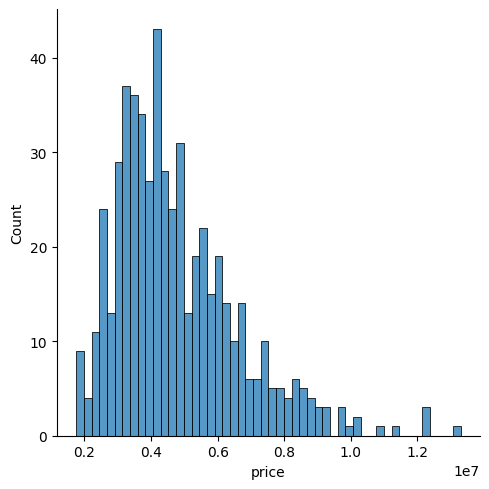

In [11]:
sns.displot(dfH['price'], bins=50)

### Pearson Correlation / Heatmap 

<function matplotlib.pyplot.show(close=None, block=None)>

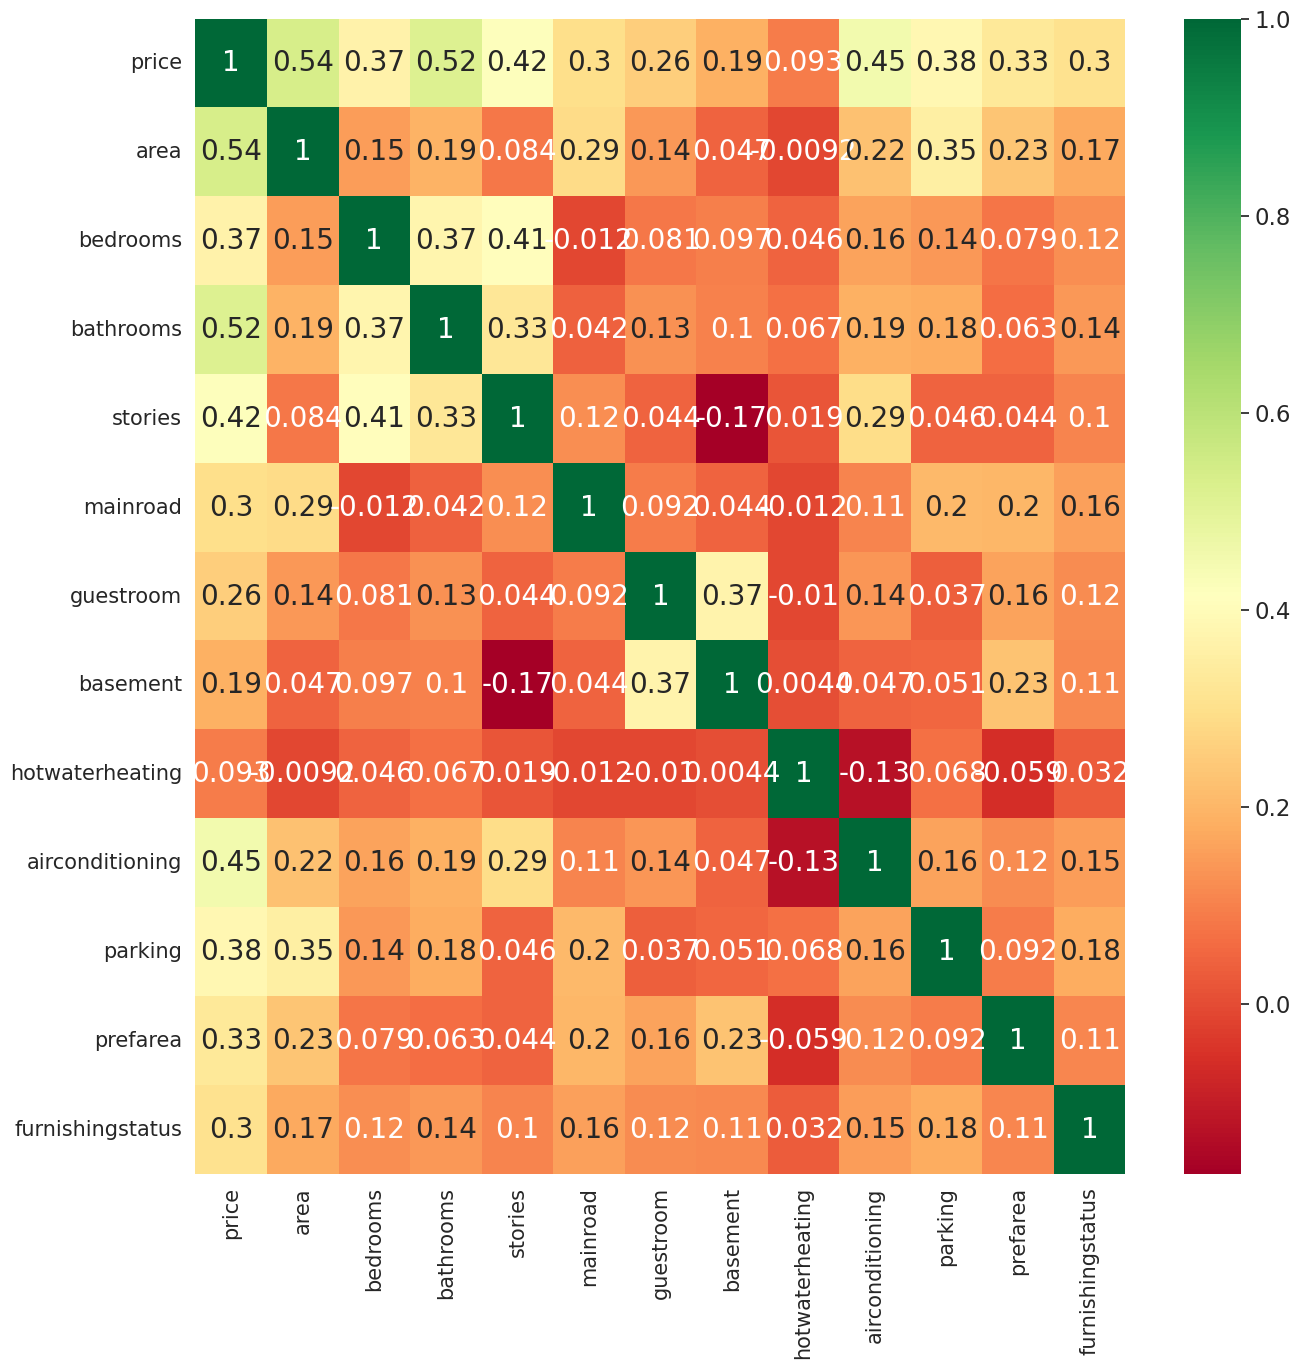

In [16]:
sns.set(font_scale=1.5)
plt.subplots(figsize=(15,15))
heat_plot=sns.heatmap(dfH.corr(method='pearson'),annot=True, cmap='RdYlGn', annot_kws= {'size':20})   # pearson correlation/heatmap

plt.yticks(fontsize=15)
plt.xticks(fontsize=15)


plt.show

## Feature Engineering

In [17]:
X4=dfH.drop(['price'], axis = 1)
Y4=dfH['price']

print(XH.shape)
print(YH.shape)

(545, 12)
(545,)


## Train-Test split

In [18]:
from sklearn.model_selection import train_test_split
xH_train, yH_train, xH_test, yH_test=train_test_split(XH,YH,test_size=0.2)

## Normalization

In [19]:
xH_test=xH_test.values.reshape(-1,1) # here if I don't write this line then come to some problem

scaler=MinMaxScaler()
xH_train=scaler.fit_transform(xH_train)
xH_test=scaler.fit_transform(xH_test)

In [20]:
print("Shape of y_train:", yH_train.shape)
print("Shape of x_train:", xH_train.shape)

Shape of y_train: (109, 12)
Shape of x_train: (436, 12)


## Train Model(Linear Regression)

In [155]:
reg=LinearRegression()
#reg.fit(x4_train[:,None], yH_train)

## Predict

In [154]:
#yH_pred=reg.predict(xH_test)

# <font color='Red'><b> DL Section <a class="anchor"  id="h1"></a>

# 1.Imports

In [18]:
import keras
from keras.models import Sequential # sequential API to create models
from keras.layers import Dense, Input, Conv2D, MaxPooling2D, Flatten # components
from keras.optimizers import SGD # Gradient Descent Algorithm
from keras.datasets import mnist # Dataset
from keras.utils import to_categorical # binarize integers

from keras.utils import plot_model # visualize graph
import skimage # utilities for image operations
from skimage.io import imshow
import matplotlib.pyplot as plt #plotting
import numpy as np #manipulate vectors, matrices, arrays etc.

# 2.Hyperparameters

In [19]:
batch_size = 128
nb_classes = 10 # no. of output labels
nb_epoch = 10


# 3.Load Dataset

In [20]:
# Load MNIST dataset
# Train-Test split
(X_train,y_train),(X_test,y_test)=mnist.load_data()

# 4.Datset Statistics

In [21]:
print("Number of training Samples and Labels: \n","Train:",len(X_train),",",len(y_train),"\n Test: ",len(X_test),",",len(y_test))


Number of training Samples and Labels: 
 Train: 60000 , 60000 
 Test:  10000 , 10000


In [22]:
print("Shape of training data: ",X_train.shape)
print("Shape of testing data : ",y_test.shape)

Shape of training data:  (60000, 28, 28)
Shape of testing data :  (10000,)


# 5.Visualizing dataset

### 5.1 Output labels

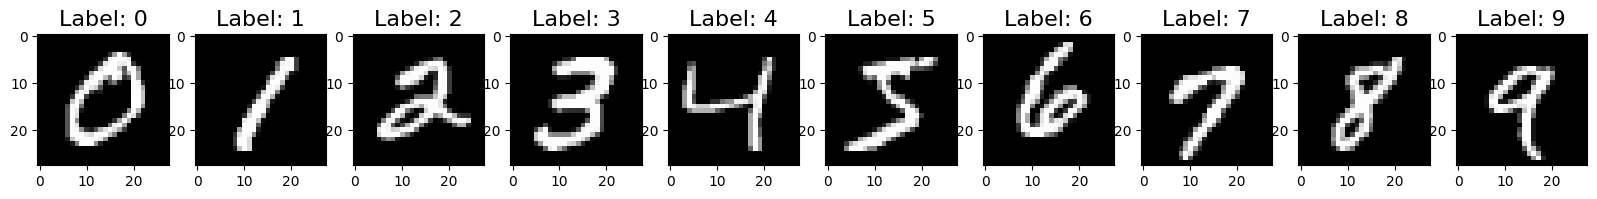

In [23]:
num_classes = 10
f, ax = plt.subplots(1, num_classes, figsize=(20,20))

for i in range(0, num_classes):
  sample = X_train[y_train == i][0]
  ax[i].imshow(sample, cmap='gray')
  ax[i].set_title("Label: {}".format(i), fontsize=16)

# 6.Preprocess

### 6.1 Binarize the labels

In [24]:
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

### 6.2 Normalize

In [25]:
X_train = X_train / 255.0 # converting to grayscale
X_test = X_test / 255.0 # from 0-255 to 0-1
# dividing by float type casts the int to float

### 6.3A Reshape(flatten for FCNN)

In [26]:
# Reshape Data
x_train = X_train.reshape(X_train.shape[0], -1)
x_test = X_test.reshape(X_test.shape[0], -1)
print("Initial:",X_train.shape)
print("Flatten:",x_train.shape)

Initial: (60000, 28, 28)
Flatten: (60000, 784)


### 6.3B Reshape(add channel for CNN)

In [27]:
X_train = np.expand_dims(X_train,-1)
X_test = np.expand_dims(X_test,-1)

print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)

X_train shape:  (60000, 28, 28, 1)
X_test shape:  (10000, 28, 28, 1)


# 7.Define Model

# 7.A FCNN

In [28]:
# Multilayer Perceptron model
model = Sequential()

model.add(Input(shape=(784,)))
model.add(Dense(784, activation='relu'))
model.add(Dense(625, activation='relu'))
model.add(Dense(10, activation= 'softmax'))

In [29]:
learning_rate = 0.001
optimizer=SGD(learning_rate=learning_rate)
loss='categorical_crossentropy'
metrics=['accuracy']
model.compile(loss=loss, optimizer=optimizer, metrics=metrics)
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 784)               615440    
                                                                 
 dense_5 (Dense)             (None, 625)               490625    
                                                                 
 dense_6 (Dense)             (None, 10)                6260      
                                                                 
Total params: 1112325 (4.24 MB)
Trainable params: 1112325 (4.24 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# 7.B CNN

In [30]:
input_shape = (28,28,1)
modelB = Sequential()
modelB.add(Input(shape=input_shape))
modelB.add(Conv2D(32,kernel_size=(3,3),activation='relu'))
modelB.add(MaxPooling2D(pool_size=(2,2)))
modelB.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
modelB.add(MaxPooling2D(pool_size=(2,2)))
modelB.add(Flatten())
modelB.add(Dense(num_classes, activation="softmax"))


In [34]:
# Compile model
modelB.compile(optimizer='adam',loss=loss,metrics=metrics)
modelB.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dense_7 (Dense)             (None, 10)               

# 8.Model Training

## 8.A FCNN

In [32]:
history = model.fit(x_train,y_train, batch_size=batch_size, epochs=nb_epoch)


Epoch 1/10
469/469 [==============================] - 6s 12ms/step - loss: 2.1576 - accuracy: 0.3371
Epoch 2/10
469/469 [==============================] - 5s 11ms/step - loss: 1.8017 - accuracy: 0.6795
Epoch 3/10
469/469 [==============================] - 5s 11ms/step - loss: 1.4602 - accuracy: 0.7617
Epoch 4/10
469/469 [==============================] - 5s 12ms/step - loss: 1.1740 - accuracy: 0.8013
Epoch 5/10
469/469 [==============================] - 5s 11ms/step - loss: 0.9658 - accuracy: 0.8230
Epoch 6/10
469/469 [==============================] - 5s 11ms/step - loss: 0.8221 - accuracy: 0.8381
Epoch 7/10
469/469 [==============================] - 6s 12ms/step - loss: 0.7219 - accuracy: 0.8484
Epoch 8/10
469/469 [==============================] - 5s 11ms/step - loss: 0.6498 - accuracy: 0.8569
Epoch 9/10
469/469 [==============================] - 5s 11ms/step - loss: 0.5960 - accuracy: 0.8632
Epoch 10/10
469/469 [==============================] - 5s 11ms/step - loss: 0.5545 - accura

## 8.B CNN

In [35]:
historyB = modelB.fit(X_train,y_train, batch_size=batch_size, epochs=nb_epoch)

Epoch 1/10
469/469 [==============================] - 21s 43ms/step - loss: 0.2677 - accuracy: 0.9247
Epoch 2/10
469/469 [==============================] - 21s 44ms/step - loss: 0.0706 - accuracy: 0.9790
Epoch 3/10
469/469 [==============================] - 19s 42ms/step - loss: 0.0531 - accuracy: 0.9836
Epoch 4/10
469/469 [==============================] - 20s 43ms/step - loss: 0.0427 - accuracy: 0.9865
Epoch 5/10
469/469 [==============================] - 20s 43ms/step - loss: 0.0368 - accuracy: 0.9889
Epoch 6/10
469/469 [==============================] - 20s 43ms/step - loss: 0.0317 - accuracy: 0.9905
Epoch 7/10
469/469 [==============================] - 20s 43ms/step - loss: 0.0270 - accuracy: 0.9914
Epoch 8/10
469/469 [==============================] - 19s 41ms/step - loss: 0.0239 - accuracy: 0.9921
Epoch 9/10
469/469 [==============================] - 20s 42ms/step - loss: 0.0210 - accuracy: 0.9934
Epoch 10/10
469/469 [==============================] - 20s 42ms/step - loss: 0.018

# 10.Evaluation

### 10.A FCNN

In [37]:
evaluation = model.evaluate(x_test,y_test)
print('Loss: %.2f, Accuracy: %.2f' % (evaluation[0]*100, evaluation[1]*100))

313/313 [==============================] - 1s 3ms/step - loss: 0.5130 - accuracy: 0.8806
Loss: 51.30, Accuracy: 88.06


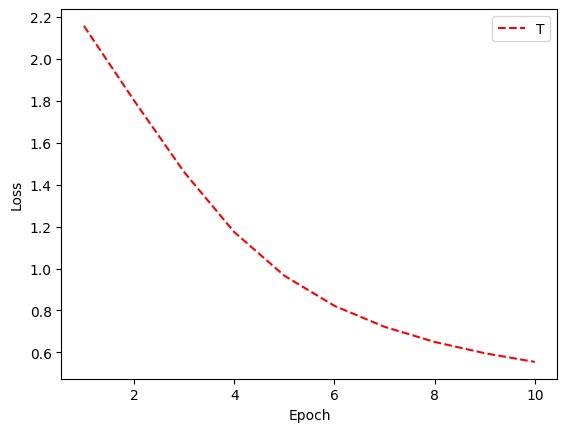

In [38]:
training_loss = history.history['loss']
epoch_count = range(1, len(training_loss)+1)

plt.plot(epoch_count, training_loss, 'r--')
plt.legend('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

### 10.B CNN

In [42]:
evaluationB = modelB.evaluate(X_test,y_test)
print('Loss: %.2f, Accuracy: %.2f' % (evaluation[0]*100, evaluation[1]*100))

313/313 [==============================] - 2s 5ms/step - loss: 0.0329 - accuracy: 0.9901
Loss: 3.29, Accuracy: 99.01
